# Modelos de Clasificación Lineal



In [10]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

### Cargamos archivo

In [11]:
#Archivo 
car = pd.read_csv("car_data.csv")
car.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


## Linear Discriminant Analysis (LDA)

### Definimos variables 
Independientes: "Age" y "AnnualSalary"
Dependiente: "Purchased", si han o no comprado un auto

In [12]:
# Definimos variables
X = car[["Age", "AnnualSalary"]].values
y = car["Purchased"].values

# Ajustamos el modelo de LDA.
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Utilizando el modelo, realizamos una predicción.
y_pred = lda.predict(X)
print(y_pred)

[0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1
 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 1 1 1 0 0 1 

### Dispersión de variables
Observamos que casi no hay relación

<function matplotlib.pyplot.show(close=None, block=None)>

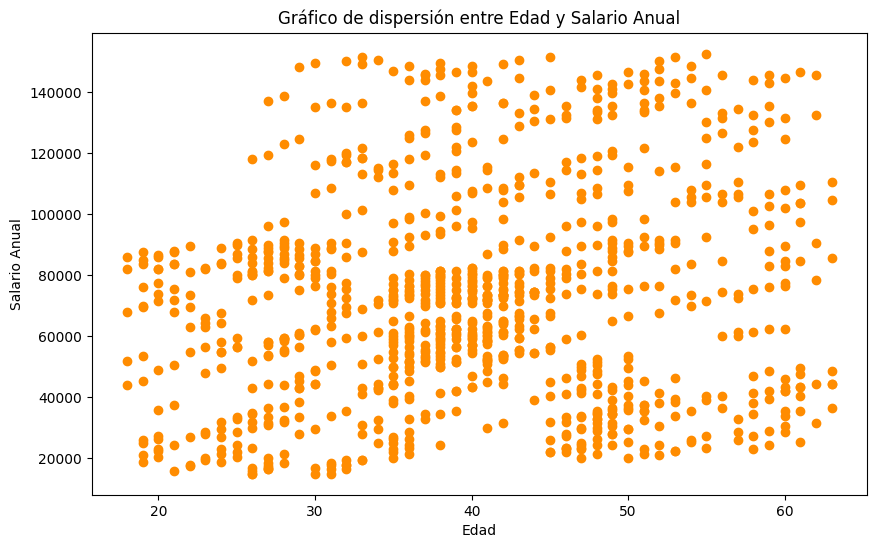

In [13]:
#Gráfico de dispersión sin división por y
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color = "darkorange")
plt.title("Gráfico de dispersión entre Edad y Salario Anual")
plt.xlabel("Edad")
plt.ylabel("Salario Anual")
plt.show

### Gráfico de clasificación de variables (utilizando y, si han comprado o no)

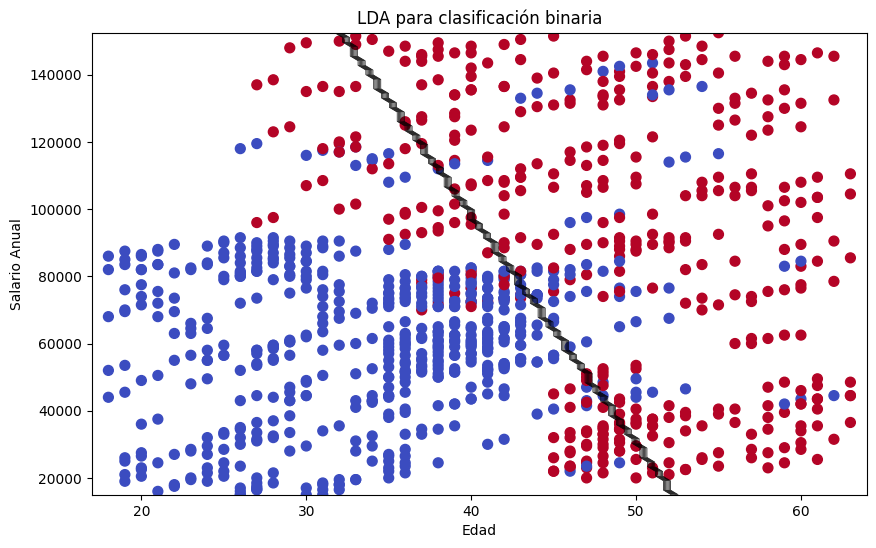

In [14]:
##graficamos considerando la respuesta (lo de c=y)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1],c=y, cmap="coolwarm", s=50)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors="k", linestyles=['-'], linewidths=[0.5])
plt.xlabel('Edad')
plt.ylabel('Salario Anual')
plt.title('LDA para clasificación binaria')
plt.show()

### Evaluación del modelo

In [15]:
#Evaluamos el modelo de discriminación
# Exactitud
accuracy = accuracy_score(y, y_pred)
print(f'Exactitud: {accuracy:.2f}')

# Precisión
precision = precision_score(y, y_pred, average='binary', pos_label = 1)
print(f'Precisión: {precision:.2f}')

# Tasa de recuperación
recall = recall_score(y, y_pred, average='binary', pos_label = 1)
print(f'Tasa de Recuperación: {recall:.2f}')

# Puntaje F1
f1 = f1_score(y, y_pred, average='binary', pos_label = 1)
print(f'Puntaje F1: {f1:.2f}')

# Reporte de clasificación
class_report = classification_report(y, y_pred, target_names=["No Adquirido", "Adquirido"])
print('Reporte de Clasificación:')
print(class_report)

Exactitud: 0.83
Precisión: 0.83
Tasa de Recuperación: 0.72
Puntaje F1: 0.77
Reporte de Clasificación:
              precision    recall  f1-score   support

No Adquirido       0.83      0.90      0.86       598
   Adquirido       0.83      0.72      0.77       402

    accuracy                           0.83      1000
   macro avg       0.83      0.81      0.82      1000
weighted avg       0.83      0.83      0.82      1000



### Validación cruzada de LDA

In [16]:
#Hacemos la Validación cruzada
k = 30
cross_val_scores = cross_val_score(lda, X, y, cv=k, scoring='accuracy')
print("Puntaje de validación cruzada:", cross_val_scores)
print("Precisión promedio:", cross_val_scores.mean())
print("Desviación estándar de la precisión:", cross_val_scores.std())


Puntaje de validación cruzada: [0.85294118 0.73529412 0.94117647 0.85294118 0.70588235 0.73529412
 0.82352941 0.88235294 0.88235294 0.73529412 0.81818182 0.81818182
 0.96969697 0.87878788 0.93939394 0.90909091 0.78787879 0.81818182
 0.90909091 0.75757576 0.75757576 0.84848485 0.84848485 0.84848485
 0.75757576 0.84848485 0.75757576 0.84848485 0.81818182 0.72727273]
Precisión promedio: 0.8271241830065359
Desviación estándar de la precisión: 0.06902888330801567


### ROC y AUC de LDA

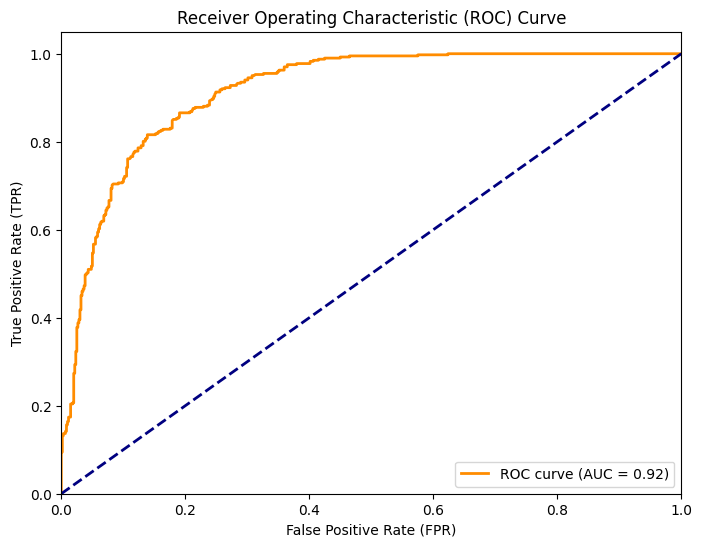

In [17]:
#Medimos ROC y AUC
y_proba = lda.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, y_proba[:, 1])
auc = roc_auc_score(y, y_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Regresión Logística Binaria

### Definimos variables
Las mismas del anterior

In [18]:
# Preprocesamiento de los datos
# Seleccionamos las covariables de interés y la variable respuesta.
features = ["Age", "AnnualSalary"]
X = car[features]
y = car['Purchased']

In [19]:
# Partimos los datos en sets de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
# Entrenamos el modelo de regresión logística.
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Realizamos predicciones con el set de prueba.
y_pred = logistic_model.predict(X_test)

### Evaluación del Modelo de Regresión Logística

In [24]:
# Evaluamos el modelo
accuracy_R = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_R:.2f}')

# Precisión
precision_R = precision_score(y_test, y_pred, average='binary', pos_label = 1)
print(f'Precisión: {precision_R:.2f}')

# Tasa de recuperación
recall_R = recall_score(y_test, y_pred, average='binary', pos_label = 1)
print(f'Tasa de Recuperación: {recall_R:.2f}')

# Puntaje F1
f1_R = f1_score(y_test, y_pred, average='binary', pos_label = 1)
print(f'Puntaje F1: {f1_R:.2f}')

#Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

#Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.55
Precisión: 0.00
Tasa de Recuperación: 0.00
Puntaje F1: 0.00
Confusion Matrix:
[[138   0]
 [112   0]]


c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       138
           1       0.00      0.00      0.00       112

    accuracy                           0.55       250
   macro avg       0.28      0.50      0.36       250
weighted avg       0.30      0.55      0.39       250



### ROC y AUC de Regresión Logística

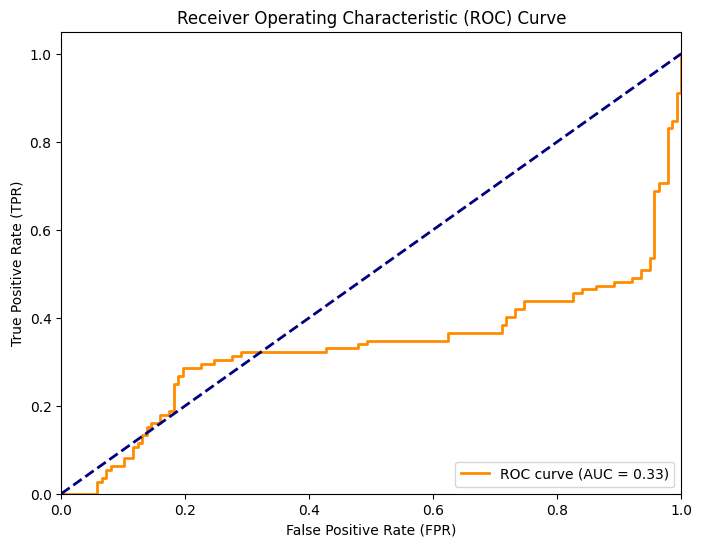

In [22]:
# Curva ROC y calculamos el AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Realizamos el gráfico de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Modelo de Regresión Logística

In [23]:
#Modelación
intercepto = logistic_model.intercept_
coeficientes = logistic_model.coef_
print("Intercepto:", intercepto)
print("Coeficientes:", coeficientes)

Intercepto: [-1.27587836e-10]
Coeficientes: [[-1.06897495e-09 -1.17503473e-06]]
